# Compte-rendu Mini-Projet - Mouvement rétrograde de Mars - Thomas LETERTRE - Mono 1A

On cherchera dans ce mini-projet à construire un modèle reproduisant le mouvement rétrograde de Mars vu depuis la Terre.

On utilisera un modèle bidimensionnel du mouvement de la Terre et de Mars autour du Soleil dans lequel le mouvement des deux planètes sera assimilé à un mouvement circulaire uniforme dans le référentiel héliocentrique et contenu dans le plan de l'écliptique. On cherchera ainsi à comparer la longitude de la position de Mars dans le référentiel géocentrique (i.e. l'angle  𝜙𝑎𝑝𝑝 dans le réferentiel géocentrique) en fonction du temps que l'on calculera dans notre modèle aux données obtenues par l'IMCCE.

![solar.png](solar.png)

On rappelle les équations du mouvement $X(t),Y(t)$ pour un mouvement circulaire uniforme de rayon $R$, de période $T$ et de phase à l'origine $\phi$. 

$$X(t)=R\cos(\phi(t)+\phi)$$
$$Y(t)=R\sin(\phi(t)+\phi)$$
Or, $\dot{\phi}=\omega$.
Donc : $$X(t)=R\cos(\omega t+\phi)$$
$$Y(t)=R\sin(\omega t+\phi)$$

A la date t=0, l'objet est donc orienté d'un angle $\phi$ par rapport à l'axe X.

Le "centre" d'un mouvement rétrograde de Mars correspond au moment où la Terre et Mars sont dans la même direction par rapport au Soleil (Soleil, Terre et Mars alignés). On connait, d'après les données de l'IMCCE la longitude de Mars vue depuis la Terre à la date du 25 mai 2016 ("centre" d'une boucle de rétrogradation): 240.5°

On a donc à cette date $t_{centre}$ :

$\phi app = arctan2 ((Y_{Mars}(t_{centre})-Y_{Terre}(t_{centre})),(X_{Mars}(t_{centre})-X_{Terre}(t_{centre})))$
$\Leftrightarrow\phi app=arctan2 (R_{Mars}\sin(\phi_{Mars}(t_{centre})+\phi_{Mars}) - R_{Terre}\sin(\phi_{Terre}(t_{centre})+\phi_{Terre}),(R_{Mars}\cos(\phi_{Mars}(t_{centre})+\phi_{Mars})-R_{Terre}\cos(\phi_{Terre}(t_{centre})+\phi_{Terre})) = 240.5°$

Si le Soleil, la Terre et Mars sont alignés, alors ils sont à un même angle $\phi(t_{centre})$.

En prenant $t_{centre} = 0$, on a $\phi(t_{centre}) = \omega t_{centre}+\phi \Leftrightarrow \phi(0) = \phi \Leftrightarrow \phi = \phi_{Terre} = \phi_{Mars} = 240.5°$

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Données et calcul des vitesses angulaires

R_Mars=1.52371*1.4959787e11 ## en m
R_Terre=1*1.4959787e11 ## en m
T_Mars=686.885 ## en jours
T_Terre=365.256 ## en jours
V_ang_Mars=2*np.pi/T_Mars ## en rad/jours
V_ang_Terre=2*np.pi/T_Terre ## en rad/jours

Phase_origine=np.radians(240.5) ## Phase à l'origine à t=0, convertie en radians

On crée deux tableaux par itération accueillant les longitudes calculées grâce à l'équation de $\phi app$ donnée plus haut: un tableau des longitudes de Mars entre la date t=0 (25 mai 2016) et la dernière date des données de l'IMCCE (16 août 2017), et un autre tableau des longitudes de Mars comprises entre la première date des données de l'IMCCE (01 mars 2015) et la date t=0. On les concaténe pour obtenir un tableau des longitudes sur le même intervalle de temps que celui des données de l'IMCCE.

In [10]:
#Création des tableaux de longitude 

##Création du tableau de longitude pour les dates entre t=0 et la dernière date des données
Delta_t_posit=448 ## Différence de temps en jours entre t=0 et la dernière date des données

Angle_app_posit=np.array([np.degrees(Phase_origine)])
for t in range(1,448,1):
    Angle_app_posit=np.append(Angle_app_posit, 360+np.degrees([np.arctan2(((R_Mars*np.sin(V_ang_Mars*t+Phase_origine))-(R_Terre*np.sin(V_ang_Terre*t+Phase_origine))),((R_Mars*np.cos(V_ang_Mars*t+Phase_origine))-(R_Terre*np.cos(V_ang_Terre*t+Phase_origine))))]),axis=0)

##Création du tableau de longitude pour les dates entre la première date des données et t=0 
Delta_t_negat=-451 ## Différence de temps en jours entre la première date des données et t=0
Angle_app_negat = np.array([np.degrees([np.arctan2(((R_Mars*np.sin(V_ang_Mars*(-451)+Phase_origine))-(R_Terre*np.sin(V_ang_Terre*(-451)+Phase_origine))), ((R_Mars*np.cos(V_ang_Mars*(-451)+Phase_origine))-(R_Terre*np.cos(V_ang_Terre*(-451)+Phase_origine))))])])
for t in range(-451,0,1):
    Angle_app_negat=np.append(Angle_app_negat, 360+np.degrees([np.arctan2(((R_Mars*np.sin(V_ang_Mars*t+Phase_origine))-(R_Terre*np.sin(V_ang_Terre*t+Phase_origine))), ((R_Mars*np.cos(V_ang_Mars*t+Phase_origine))-(R_Terre*np.cos(V_ang_Terre*t+Phase_origine))))]))

    
#Concaténation des deux tableaux

Longitude_modèle=np.concatenate((Angle_app_negat,Angle_app_posit), axis=0) 

On trace les représentations graphiques des données du fichier "DataMars.csv" et des valeurs de longitude obtenues grâce à notre modèle et on ajuste les échelles des deux axes pour obtenir des courbes centrées sur la rétrogradation.

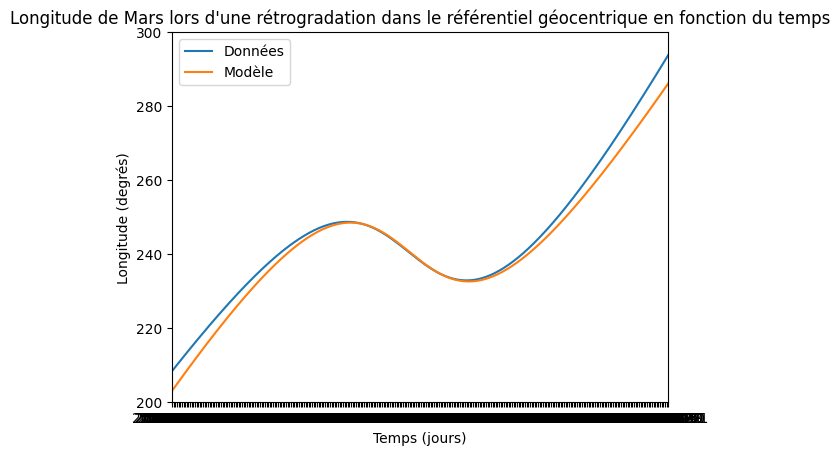

In [11]:
#Traçage des graphiques

data=pd.read_csv("DataMars.csv", skiprows=4)

Temps = data["Date"]
Longitude = data["Longitude (decimal)"]
plt.plot(Temps,Longitude, label='Données')
plt.plot(Temps,Longitude_modèle, label='Modèle')
plt.title("Longitude de Mars lors d'une rétrogradation dans le référentiel géocentrique en fonction du temps")
plt.xlabel('Temps (jours)')
plt.ylabel('Longitude (degrés)')
plt.xlim("2016-01-01","2016-11-01")
plt.ylim(200,300)
plt.legend()


On constate que notre modèle permet de décrire relativement correctement le mouvement rétrograde de Mars dans le référentiel géocentrique, les courbes de longitude en fonction du temps du modèle et des données étant relativement proches et similaires. Plus on s'éloigne du temps t=0 (centre de la boucle de rétrogradation), plus la courbe de notre modèle tend à s'écarter de celle des données: notre modèle est ainsi efficace pour la durée d'une rétrogradation de Mars mais s'avère être moins précis sur des intervalles de temps plus longs. Les hypothèses que l'on a faites sur le modèle (mouvement circulaire uniforme des planètes, plan écliptique°) ont un rôle à jouer dans le léger manque de correspondance de notre modèle aux données.
°Le mouvements de la Terre et de Mars sont en réalité plu elliptiques et varient dans les trois directions de l'espace